In [1]:
import pandas as pd
import csv
import numpy as np
import string
import re

In [2]:
words = pd.read_table("glove_word2Vec/glove.6B/glove.6B.50d.txt", sep=" ", index_col=0, header=None, quoting=csv.QUOTE_NONE)

In [3]:
wordsVector = words.as_matrix().astype(np.float32)
wordsList = words.index.tolist()

In [4]:
print(wordsVector.shape)
print(len(wordsList))

(400000, 50)
400000


In [5]:
baseballIndex = wordsList.index('baseball')
wordsVector[baseballIndex]

array([-1.93270004,  1.04209995, -0.78514999,  0.91033   ,  0.22711   ,
       -0.62158   , -1.64929998,  0.07686   , -0.58679998,  0.058831  ,
        0.35628   ,  0.68915999, -0.50598001,  0.70472997,  1.26639998,
       -0.40031001, -0.020687  ,  0.80862999, -0.90565997, -0.074054  ,
       -0.87674999, -0.62910002, -0.12684999,  0.11524   , -0.55685002,
       -1.68260002, -0.26291001,  0.22632   ,  0.713     , -1.08280003,
        2.12310004,  0.49869001,  0.066711  , -0.48225999, -0.17896999,
        0.47699001,  0.16384   ,  0.16537   , -0.11506   , -0.15962   ,
       -0.94926   , -0.42833   , -0.59456998,  1.35660005, -0.27506   ,
        0.19918001, -0.36008   ,  0.55667001, -0.70314997,  0.17157   ], dtype=float32)

In [6]:
import tensorflow as tf

maxSeqLength = 10
numDimensions = 300

firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("tought")
firstSentence[2] = wordsList.index("the")
firstSentence[3] = wordsList.index("movie")
firstSentence[4] = wordsList.index("was")
firstSentence[5] = wordsList.index("incredible")
firstSentence[6] = wordsList.index("and")
firstSentence[7] = wordsList.index("inspiring")
print(firstSentence.shape)
print(firstSentence)

(10,)
[    41 305234      0   1005     15   7446      5  13767      0      0]


### Converting sentences

 Creating a utility function to convert sentences into an numpy array of words.

In [7]:
maxSeqLength = 250

In [8]:
def convert_sentence(sentence):
    # Got from analysis below.
    maxSeqLength = 250
    index_count = 0
    
    remove_special_chars = re.compile("[^A-Za-z0-9 ]+")
    
    sentence = sentence.lower()
    sentence = sentence.translate(string.punctuation)
    sentence = re.sub(remove_special_chars, "", sentence)
    sentence = sentence.split(" ")
    if len(sentence) > maxSeqLength:
        sentence = sentence[:maxSeqLength]
    sentenceList = np.zeros((maxSeqLength), dtype='int32')
    for word in sentence:
        try:
            sentenceList[index_count] = wordsList.index(word)
        except ValueError:
            # TODO create a vector for unknow words
            # https://groups.google.com/forum/#!topic/globalvectors/n6BYywiENGo
            # For now just skip unkown words
            sentenceList[index_count] = 0
            
        index_count = index_count + 1
        
    return np.array(sentenceList)

In [9]:
testSent = "Hello, how are you doing today?"

testSentVec = convert_sentence(testSent)

print(testSentVec)

[13075   197    32    81   914   373     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [10]:
with tf.Session() as sess:
    print(tf.nn.embedding_lookup(wordsVector, firstSentence).eval().shape)

(10, 50)


## Load Data

Now we will load the movie review data. 
The data comes from https://www.kaggle.com/c/word2vec-nlp-tutorial/data

In [11]:
train_reviews = pd.read_table("movie_review_dataset/labeledTrainData/labeledTrainData.tsv", sep='\t')

In [12]:
train_reviews.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [13]:
train_reviews.shape

(25000, 3)

## Exploratory analysis

Exploring the number of words in each review 

In [14]:
def sentence_len(sentence):
    sentence = sentence.translate(string.punctuation)
    sentence = sentence.split(" ")
    return len(sentence)

In [15]:
num_words = train_reviews.apply(lambda row: sentence_len(row['review']), axis=1)

In [16]:
num_words.describe()

count    25000.000000
mean       233.786240
std        173.745845
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
dtype: float64

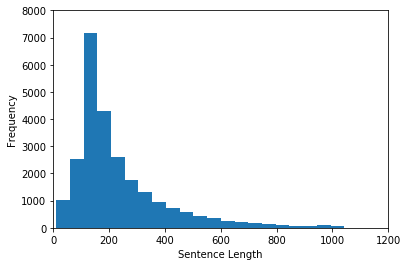

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(num_words, 50)
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.axis([0, 1200, 0, 8000])
plt.show()

## Converting words to word vecs

Code in this section has been commented out as it takes quite alot of time to run it.
Instead we can just load data from a csv file

#### TODO

We may have to have all reviews be of the same length. This is kind of inconvinient since we will lose information.
Check if anyone has a solution to this.

##### UPDATE 6/12/2017
Now that we end up with a list of lists from this conversion, it may be possible to have the internal lists be of different length. Because I am converting the list to a DataFrame I wont try to have different lengths yet.

First, try this with a subset of the training data. Maybe the first 500 rows.

In [18]:
# subset_reviews = train_reviews.iloc[0:500]

Using apply wasn't working correctly so I decided to use a list comprehension

In [19]:
# subset_reviews_ids = [convert_sentence(row[3]) for row in subset_reviews.itertuples()]

In [20]:
# subset_reviews_ids = pd.DataFrame(subset_reviews_ids)
# subset_reviews_ids.shape

In [21]:
# subset_reviews_ids.head(2)

Now apply it to whole dataset. 

This takes a **LONG** time to run therefore, I have saved the output file as a csv which can loaded to skip this step.

In [22]:
# train_reviews_ids = [convert_sentence(row[3]) for row in train_reviews.itertuples()]

In [23]:
# train_reviews_ids_df = pd.DataFrame(train_reviews_ids)

In [24]:
# train_reviews_ids_df.shape

In [25]:
# train_reviews_ids_df.head()

In [26]:
# train_reviews_ids_df.to_csv("movie_review_dataset/labeledTrainData/ids_matrix.csv", index=False)

#### TODO: remove drop once new version of csv is created

In [27]:
train_reviews_ids_df = pd.read_csv("movie_review_dataset/labeledTrainData/ids_matrix.csv").drop(['Unnamed: 0'],axis=1)

## RNN Model

Setting hyper parameters

In [28]:
batch_size = 24
lstm_units = 64
num_classes = 2
itterations = 100000

In [29]:
import tensorflow as tf
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batch_size, num_classes])
input_data = tf.placeholder(tf.int32, [batch_size, maxSeqLength])

In [30]:
data = tf.Variable(tf.zeros([batch_size, maxSeqLength, numDimensions]), dtype=tf.float32)

data = tf.nn.embedding_lookup(wordsVector, input_data)

In [31]:
lstm_cell = tf.contrib.rnn.BasicLSTMCell(lstm_units)
lstm_cell = tf.contrib.rnn.DropoutWrapper(cell=lstm_cell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstm_cell, data, dtype=tf.float32)

In [32]:
weight = tf.Variable(tf.truncated_normal([lstm_units, num_classes]))
bias = tf.Variable(tf.constant(0.1, shape=[num_classes]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

In [33]:
correctPred = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [34]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

In [35]:
import datetime

tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)

## Train Network



#### Testing for functions  -  Delete later

In [36]:
# train_reviews.head()
train_reviews.iloc[1, 1]

1

In [37]:
train_reviews_ids_df.head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,17,64,37,3496,222,135,22,0,1600,17,...,18,38,14,10485,1603,34339,100,41,113442,1881
1,0,2392,136,3,0,6965,21,7842,20457,14,...,0,0,0,0,0,0,0,0,0,0
2,0,319,2383,17,7,865,5616,2913,1227,3143,...,0,23912,0,5,23243,46,23236,74,3411,0
3,20,390,30,4656,12,155,38,3490,37,319,...,74688,285,6,0,2496,53,1071,33,4,2365
4,30566,53332,5,136455,45659,15835,10534,72004,0,0,...,359,592,2219,8558,14,106212,21809,0,5230,1432


In [38]:
(train_reviews_ids_df.shape[0]-1)

24999

In [39]:
from random import randint

test = randint(1, train_reviews_ids_df.shape[0]-1)
ans = train_reviews_ids_df[test-1:test].as_matrix()

print(ans)
print(type(ans))


[[    19      7    139    685     47     29  12965      4    269     12
    1318     15   1403   1136      4   1711     37      0  30410    504
       0    853     12      0    369     15     48      3      0   2601
      10      0    929  52729  19367   6571     37   1072      4      0
     281     14  18615      0    929    281     15    243     13   2245
    4490     59      7    300     38     15      7    353   6620    329
       5   9172      7    300     38    334      7    426    542      6
   12775      0    299      3    250   5812      6    139      0  30410
       0   2219      3     37    319    212     14    936     34  86071
   27020     25      0   2389      3      0   3401     21      7   1541
      12     31    848      4  15114    108      0      0  30410    110
    5207   7538      5   1793 107928     32    219   3826    102     14
     684  62557    914    187  19361  15095   7515     17     26    639
   30075      5  43425      0  30410     41   1290   5323  14753

In [42]:
a, b = getTrainBatch()

print(a[0])
print(b[0])

[  1.90000000e+01   7.00000000e+00   1.39000000e+02   6.85000000e+02
   4.70000000e+01   2.90000000e+01   1.29650000e+04   4.00000000e+00
   2.69000000e+02   1.20000000e+01   1.31800000e+03   1.50000000e+01
   1.40300000e+03   1.13600000e+03   4.00000000e+00   1.71100000e+03
   3.70000000e+01   0.00000000e+00   3.04100000e+04   5.04000000e+02
   0.00000000e+00   8.53000000e+02   1.20000000e+01   0.00000000e+00
   3.69000000e+02   1.50000000e+01   4.80000000e+01   3.00000000e+00
   0.00000000e+00   2.60100000e+03   1.00000000e+01   0.00000000e+00
   9.29000000e+02   5.27290000e+04   1.93670000e+04   6.57100000e+03
   3.70000000e+01   1.07200000e+03   4.00000000e+00   0.00000000e+00
   2.81000000e+02   1.40000000e+01   1.86150000e+04   0.00000000e+00
   9.29000000e+02   2.81000000e+02   1.50000000e+01   2.43000000e+02
   1.30000000e+01   2.24500000e+03   4.49000000e+03   5.90000000e+01
   7.00000000e+00   3.00000000e+02   3.80000000e+01   1.50000000e+01
   7.00000000e+00   3.53000000e+02

#### Testing for functions  -  Delete later ABOVE

In [41]:
from random import randint

# Helper functions to provide data for batch
def getTrainBatch():
    labels = []
    arr = np.zeros([batch_size, maxSeqLength])
    
    for i in range(batch_size):
        num = randint(1, train_reviews_ids_df.shape[0]-1)
        arr[i] = train_reviews_ids_df[test-1:test].as_matrix()
        labels.append([1, 0]) if train_reviews.iloc[i, 1] == 1 else labels.append([0, 1])
    
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batch_size, maxSeqLength])
    
    for i in range(batch_size):
        num = randint(1, train_reviews_ids_df.shape[0]-1)
        arr[i] = train_reviews_ids_df[test-1:test].as_matrix()
        labels.append([1, 0]) if train_reviews.iloc[i, 1] == 1 else labels.append([0, 1])
    print("TEST DATA HAS NOT BEEN LOADED YET")
    # TODO: Load test data and do same prep as training data
    return None, None

In [43]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

for i in range(itterations):
    # Get next batch of reviews
    nextBatch, nextBatchLabels = getTrainBatch()
    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels})
    
    #Write summary to Tensorboard
    if (i % 50 == 0):
        summary = sess.run(merged, {input_data: nextBatch, labels: nextBatchLabels})
        writer.add_summary(summary, i)
        
    #Save the network every 10,000 training iterations
    if(i % 10000 == 0 and i != 0):
        save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step = 1)
        print("saved to %s" % save_path)

writer.close()

AttributeError: 'Saver' object has no attribute 'saver'